g = [ 26.42857143  64.         158.57142857]
X = [[ 48  92 175]
 [ 39  78 162]
 [ 31  72 165]
 [  3  14  95]
 [ 27  70 180]
 [ 22  67 173]
 [ 15  55 160]]
Xc = [[ 21.57142857  28.          16.42857143]
 [ 12.57142857  14.           3.42857143]
 [  4.57142857   8.           6.42857143]
 [-23.42857143 -50.         -63.57142857]
 [  0.57142857   6.          21.42857143]
 [ -4.42857143   3.          14.42857143]
 [-11.42857143  -9.           1.42857143]]
Xct = [[ 4.19606361  3.5         1.30462991]
 [ 2.44538806  1.75        0.27227059]
 [ 0.88923202  1.          0.51050736]
 [-4.55731412 -6.25       -5.04835052]
 [ 0.111154    0.75        1.70169119]
 [-0.86144352  0.375       1.1458054 ]
 [-2.22308006 -1.125       0.11344608]]


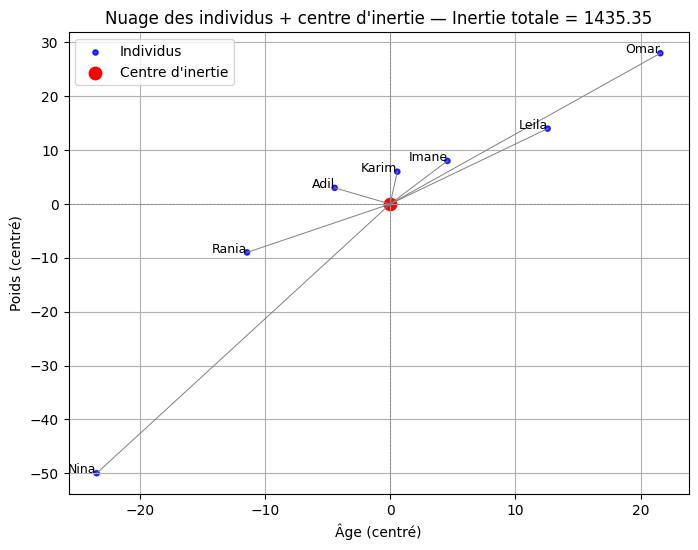

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("data/dataset_caracteristiques.csv")

# Séparer les noms et les données numériques
X = df[['Age', 'Poids', 'Taille']].values  # Données numériques
noms = df['Nom'].values                   # Noms
n, p = X.shape

# Poids uniformes
p_i = np.ones(n) / n
D = np.diag(p_i)

# Centre de gravité pondéré
g = X.T @ p_i  # moyenne pondérée (shape = (p,))

# Centrage pondéré
Xc = X - g  # shape = (n, p)
Xct = Xc / np.sqrt(g)

print(f'g = {g}')
print(f'X = {X}')
print(f'Xc = {Xc}')
print(f'Xct = {Xct}')

# Inertie totale
inertie_totale = np.sum(p_i * np.sum(Xc**2, axis=1))

# --- Visualisation 2D ---
plt.figure(figsize=(8, 6))
plt.scatter(Xc[:, 0], Xc[:, 1], s=100 * p_i, c='blue', alpha=0.8, label='Individus')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Tracer le centre (0,0 après centrage)
plt.scatter(0, 0, color='red', s=80, marker='o', label='Centre d\'inertie')

# Lignes des individus vers le centre
for i in range(n):
    plt.plot([Xc[i, 0], 0], [Xc[i, 1], 0], color='gray', linewidth=0.7)

# Ajouter noms
for i, nom in enumerate(noms):
    plt.text(Xc[i, 0], Xc[i, 1], nom, fontsize=9, ha='right')

plt.xlabel("Âge (centré)")
plt.ylabel("Poids (centré)")  # 1ʳᵉ et 2ᵉ variable
plt.title(f"Nuage des individus + centre d'inertie — Inertie totale = {inertie_totale:.2f}")
plt.grid(True)
plt.legend()
plt.show()


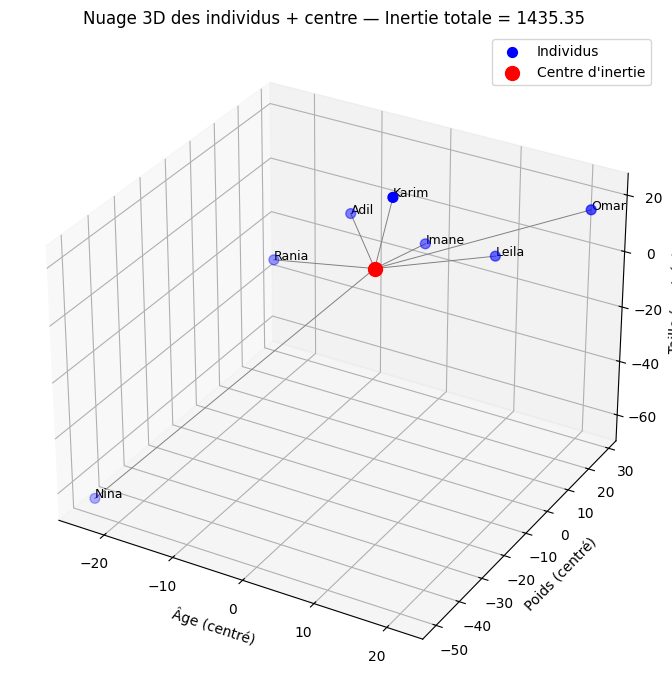

In [2]:
df = pd.read_csv("data/dataset_caracteristiques.csv")

# Extraire données numériques et noms
X = df[['Age', 'Poids', 'Taille']].values
noms = df['Nom'].values
n = len(noms)

# Centrage
g = X.mean(axis=0)
Xc = X - g  # données centrées

# Inertie totale (facultatif ici)
p_i = np.ones(n) / n
inertie_totale = np.sum(p_i * np.sum(Xc**2, axis=1))

# Tracé 3D avec centre et lignes
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Nuage des individus
ax.scatter(Xc[:, 0], Xc[:, 1], Xc[:, 2], c='blue', s=50, label="Individus")

# Centre d'inertie
ax.scatter(0, 0, 0, color='red', s=100, label="Centre d'inertie")

# Lignes des individus vers le centre
for i in range(n):
    ax.plot([Xc[i, 0], 0], [Xc[i, 1], 0], [Xc[i, 2], 0], color='gray', linewidth=0.7)

# Ajouter les noms des individus
for i, nom in enumerate(noms):
    ax.text(Xc[i, 0], Xc[i, 1], Xc[i, 2], nom, fontsize=9)

# Axes
ax.set_xlabel("Âge (centré)")
ax.set_ylabel("Poids (centré)")
ax.set_zlabel("Taille (centrée)")
ax.set_title(f"Nuage 3D des individus + centre — Inertie totale = {inertie_totale:.2f}")
ax.legend()
plt.tight_layout()
plt.show()

In [3]:
sigma = Xc.T @ D @ Xc
print(f'la matrice Xc est:')
print(Xc)
print(f'la matrice sigma est:')
print(sigma)
print(f'trace de sigma:',np.trace(sigma))
print(f'la somme de Var(Xj):',np.sum(sigma.diagonal()))
print(f'g:',g)

la matrice Xc est:
[[ 21.57142857  28.          16.42857143]
 [ 12.57142857  14.           3.42857143]
 [  4.57142857   8.           6.42857143]
 [-23.42857143 -50.         -63.57142857]
 [  0.57142857   6.          21.42857143]
 [ -4.42857143   3.          14.42857143]
 [-11.42857143  -9.           1.42857143]]
la matrice sigma est:
[[191.95918367 297.28571429 264.04081633]
 [297.28571429 524.28571429 556.71428571]
 [264.04081633 556.71428571 719.10204082]]
trace de sigma: 1435.3469387755104
la somme de Var(Xj): 1435.3469387755104
g: [ 26.42857143  64.         158.57142857]


Valeurs propres : [1.32390539e+03 1.10267947e+02 1.17360449e+00]
Vecteur propre de Y1 (α1) : [-0.32892498 -0.61889558 -0.71328579]
Variance expliquée par Y1 : 92.23591535694003 %
Scores Y1 :
[-36.1427245  -15.24514629 -11.04023035  83.99561806 -19.1860261
 -10.69171395   8.31022314]


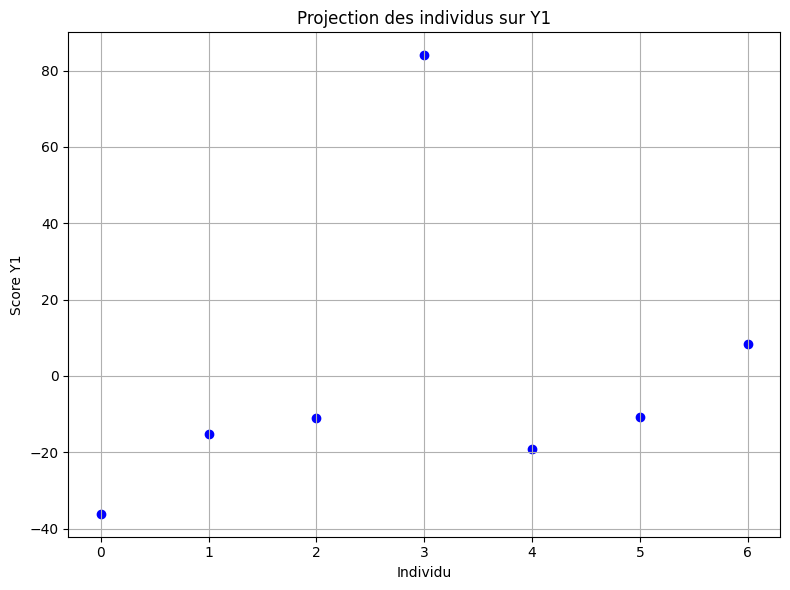

In [4]:
# Étape 1 : calcul des valeurs propres et vecteurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(sigma)

# Étape 2 : trier par ordre décroissant (important en ACP)
idx = np.argsort(valeurs_propres)[::-1]
valeurs_propres = valeurs_propres[idx]
vecteurs_propres = vecteurs_propres[:, idx]

# Étape 3 : proportion d'inertie (variance expliquée)
inertie_totale = np.sum(valeurs_propres)
proportions = valeurs_propres / inertie_totale

# Résultats
print("Valeurs propres :", valeurs_propres)
print("Vecteur propre de Y1 (α1) :", vecteurs_propres[:, 0])
print("Variance expliquée par Y1 :", proportions[0] * 100, "%")

# Calcul des scores Y1
Y1 = Xc @ vecteurs_propres[:, 0]
Y2 = Xc @ vecteurs_propres[:, 1]
print(f'Scores Y1 :\n{Y1}')

# Affichage avec noms
plt.figure(figsize=(8, 6))
plt.scatter(range(len(Y1)), Y1, color='blue')


plt.title("Projection des individus sur Y1")
plt.xlabel("Individu")
plt.ylabel("Score Y1")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Calcule de Var(Y1).
print(f'Scores Y1 :\n{Y1}')
VarY1 = vecteurs_propres[:, 0].T @ sigma @ vecteurs_propres[:, 0]
print(f'Variance Y1:', VarY1)
print(f'Valeur propre lambda1:', valeurs_propres[0])
print(VarY1,' == ', valeurs_propres[0])
print(f' (t9riban) Var(Y1) == Lambda')
print(f'Norm v1:', vecteurs_propres[:, 0].T @ vecteurs_propres[:, 0])

Scores Y1 :
[-36.1427245  -15.24514629 -11.04023035  83.99561806 -19.1860261
 -10.69171395   8.31022314]
Variance Y1: 1323.905387527409
Valeur propre lambda1: 1323.9053875274096
1323.905387527409  ==  1323.9053875274096
 (t9riban) Var(Y1) == Lambda
Norm v1: 1.0


In [6]:
print(f'Scores Y2 :\n{Y2}')
VarY2 = vecteurs_propres[:, 1].T @ sigma @ vecteurs_propres[:, 1]
print('Variance Y2:',VarY2)
print(f'Valeur propre lambda2:',valeurs_propres[1])
print(VarY2,' == ', valeurs_propres[1])
print(f'(exactly) Var(Y1) == Lambda')
print(f'Norm v1:', vecteurs_propres[:, 1].T @ vecteurs_propres[:, 1])
print(f'vectProp2T @ vectProp1:', vecteurs_propres[:, 1].T @ vecteurs_propres[:, 0])
print('That number is very clode to 0: 0.0000000000000002220446049250313')

Scores Y2 :
[-14.59194936 -11.54851521  -2.00326473  -5.89575517  11.04679266
  11.02418454  11.96850727]
Variance Y2: 110.26794675469482
Valeur propre lambda2: 110.26794675469475
110.26794675469482  ==  110.26794675469475
(exactly) Var(Y1) == Lambda
Norm v1: 1.0000000000000002
vectProp2T @ vectProp1: -2.7755575615628914e-16
That number is very clode to 0: 0.0000000000000002220446049250313


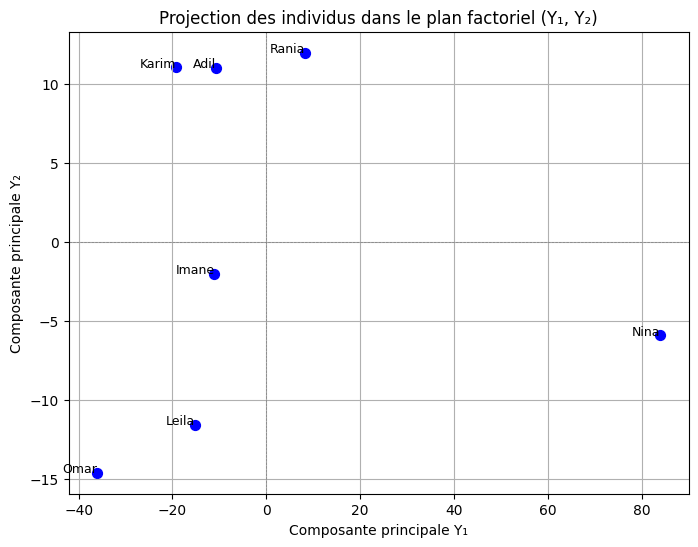

In [7]:
# Tracer le plan factoriel
plt.figure(figsize=(8, 6))
plt.scatter(Y1, Y2, c='blue', s=50)

# Ajouter les noms des individus
for i, nom in enumerate(noms):
    plt.text(Y1[i], Y2[i], nom, fontsize=9, ha='right')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("Composante principale Y₁")
plt.ylabel("Composante principale Y₂")
plt.title("Projection des individus dans le plan factoriel (Y₁, Y₂)")
plt.grid(True)
plt.show()

In [8]:
print("Vecteur propre α1 :", vecteurs_propres[:, 0])


Vecteur propre α1 : [-0.32892498 -0.61889558 -0.71328579]
